In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

import torch
from torch import autograd
import torch.nn.functional as F

images = np.load("images.npy")
labels = np.load("labels.npy")

val_entries = np.random.choice(len(labels), size=int(len(labels)*0.1), replace=False)

flat_images = np.zeros((len(images),len(images[0])*len(images[0][0])))
for i in range(0, len(images)-1):
    flat_images[i] = images[i].flatten()

not_val = [x for x in range(len(flat_images)) if x not in val_entries]
    
train_images = flat_images[not_val]
train_labels = labels[not_val]
val_images = flat_images[val_entries]
val_labels = labels[val_entries]

HEIGHT = 26
WIDTH = 26
NUM_CLASSES = 5
D_H = 100
NUM_OPT_STEPS = 2000

In [2]:
class TwoSimpleConvNN(torch.nn.Module):
    
    def __init__(self):
        super().__init__()
        self.conv1 = torch.nn.Conv2d(1, 8, kernel_size=3)
        self.conv2 = torch.nn.Conv2d(8, 16 ,kernel_size=3, stride=2)
        self.final_conv = torch.nn.Conv2d(16, 5, kernel_size=1)
        
    def forward(self, x):
        x = x.view(-1, HEIGHT, WIDTH).unsqueeze(1)
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        n, c, h, w = x.size()
        x = F.avg_pool2d(x, kernel_size=[h, w])
        x = self.final_conv(x).view(-1, NUM_CLASSES)
        return x

In [3]:
model = TwoSimpleConvNN()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

In [4]:
def train(batch_size):
    i = np.random.choice(train_images.shape[0], size=batch_size, replace=False)
    x = torch.from_numpy(train_images[i].astype(np.float32))
    y = torch.from_numpy(train_labels[i].astype(np.int))
    y_hat_ = model(x)
    loss = F.cross_entropy(y_hat_, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    del x
    return loss.item()

In [5]:
def accuracy(y, y_hat):
    return (y == y_hat).astype(np.float).mean()

In [6]:
def approx_train_accuracy():
    i = np.random.choice(train_images.shape[0], size=1000, replace=False)
    x = torch.from_numpy(train_images[i].astype(np.float32))
    y = torch.from_numpy(train_labels[i].astype(np.int))
    y_hat = torch.from_numpy(labels[i].astype(np.int))
    for spot, val in enumerate(x):
        y_hat[spot] = torch.max(model(val), 1)[1]
    del x
    return accuracy(y.numpy(), y_hat.numpy())

In [7]:
def val_accuracy():
    x = torch.from_numpy(val_images.astype(np.float32))
    y = torch.from_numpy(val_labels.astype(np.int))
    y_hat = torch.from_numpy(val_labels.astype(np.int))
    for spot, val in enumerate(x):
        y_hat[spot] = torch.max(model(val), 1)[1]
    del x
    return accuracy(y.numpy(), y_hat.numpy())

In [8]:
train_accs, val_accs, steps = [], [], []
for i in range(NUM_OPT_STEPS):
    train(10)
    if i % 100 == 0:
        train_accs.append(approx_train_accuracy())
        val_accs.append(val_accuracy())
        steps.append(i)
        print("%6d %5.2f %5.2f" % (i, train_accs[-1], val_accs[-1]))

     0  0.20  0.21
   100  0.27  0.27
   200  0.49  0.47
   300  0.49  0.47
   400  0.59  0.61
   500  0.53  0.54
   600  0.58  0.59
   700  0.70  0.69
   800  0.69  0.69
   900  0.64  0.64
  1000  0.72  0.70
  1100  0.73  0.72
  1200  0.71  0.74
  1300  0.72  0.73
  1400  0.69  0.68
  1500  0.70  0.70
  1600  0.74  0.75
  1700  0.72  0.73
  1800  0.78  0.77
  1900  0.69  0.72


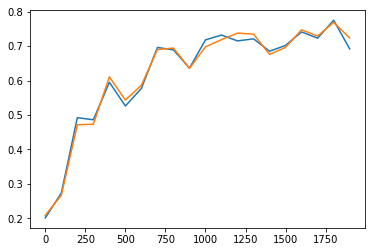

In [9]:
plt.plot(steps, train_accs)
plt.plot(steps, val_accs)

In [10]:
model.conv1.reset_parameters()
model.conv2.reset_parameters()
model.final_conv.reset_parameters()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-2)
train_accs, val_accs, steps = [], [], []
for i in range(NUM_OPT_STEPS*3 - 1500):
    train(800)
    if i % 100 == 0:
        train_accs.append(approx_train_accuracy())
        val_accs.append(val_accuracy())
        steps.append(i)
        print("%6d %5.2f %5.2f" % (i, train_accs[-1], val_accs[-1]))

     0  0.20  0.20
   100  0.63  0.63
   200  0.78  0.75
   300  0.74  0.76
   400  0.77  0.78
   500  0.82  0.80
   600  0.79  0.79
   700  0.80  0.82
   800  0.83  0.83
   900  0.84  0.82
  1000  0.81  0.83
  1100  0.83  0.83
  1200  0.84  0.84
  1300  0.84  0.84
  1400  0.85  0.83
  1500  0.86  0.86
  1600  0.86  0.86
  1700  0.86  0.86
  1800  0.85  0.85
  1900  0.86  0.83
  2000  0.87  0.86
  2100  0.87  0.86
  2200  0.85  0.85
  2300  0.86  0.85
  2400  0.86  0.87
  2500  0.84  0.84
  2600  0.85  0.86
  2700  0.87  0.87
  2800  0.85  0.87
  2900  0.85  0.85
  3000  0.87  0.87
  3100  0.87  0.87
  3200  0.87  0.87
  3300  0.85  0.84
  3400  0.89  0.87
  3500  0.88  0.88
  3600  0.86  0.87
  3700  0.88  0.88
  3800  0.89  0.88
  3900  0.87  0.85
  4000  0.85  0.86
  4100  0.86  0.87
  4200  0.86  0.87
  4300  0.85  0.85
  4400  0.87  0.88


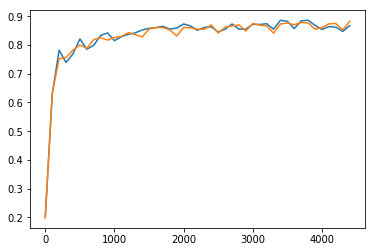

In [11]:
plt.plot(steps, train_accs)
plt.plot(steps, val_accs)